Sascha Spors,
Professorship Signal Theory and Digital Signal Processing,
Institute of Communications Engineering (INT),
Faculty of Computer Science and Electrical Engineering (IEF),
University of Rostock,
Germany

# Tutorial Digital Signal Processing

**DFT Fundamentals**,
Winter Semester 2021/22 (Course #24505)

- lecture: https://github.com/spatialaudio/digital-signal-processing-lecture
- tutorial: https://github.com/spatialaudio/digital-signal-processing-exercises

Feel free to contact lecturer frank.schultz@uni-rostock.de

In [30]:
import numpy as np
import timeit

from matplotlib import pyplot as plt
from numpy.fft import fft, ifft
#from scipy.fft import fft, ifft
from scipy.special import diric

These exercises accompany the [dft_windowing_tutorial.pdf](dft_windowing_tutorial.pdf)

## Exercise 1: My Own DFT / IDFT Implementation

Write Python functions `X = my_dft(x)` and `x = my_idft(X)` that calculate the DFT pair

\begin{align}
X[\mu] = \mathrm{DFT}_N\{x[k]\} = &\sum_{k=0}^{N-1} x[k] \, (\mathrm{e}^{-\mathrm{j}\frac{2\pi}{N}})^{k \cdot \mu}
\\
x[k] = \mathrm{IDFT}_N\{X[\mu]\} = \frac{1}{N} &\sum_{\mu=0}^{N-1} X[\mu] \, (\mathrm{e}^{+\mathrm{j}\frac{2\pi}{N}})^{k \cdot \mu}
\end{align}
without using the pre-built functions `fft()` and `ifft()`. Check validity and performance against the built-in functions, especially try large $N$. We might consider the matrix operation approach rather than a for-loop implementation, given that the $N \times N$ matrix fits into our RAM.

In [31]:
def get_fourier_matrix(N):
    k = np.arange(N)
    return np.exp(+1j*2*np.pi/N*np.outer(k, k))


def my_dft(x):
    N = x.size
    return np.conj(get_fourier_matrix(N))@x


def my_idft(X):
    N = X.size
    return 1/N*get_fourier_matrix(N)@X

In [32]:
N = 2**8

Check `my_dft` against numpy's `fft` with numpy's `allclose`

In [33]:
# create random complex valued signal
x = np.random.randn(N) + 1j * np.random.randn(N)
# check against numpy fft
np.allclose(my_dft(x), fft(x))

True

Check `my_idft` against numpy's `ifft` with numpy's `allclose`

In [34]:
# create random complex valued spectrum
X = np.random.randn(N) + 1j * np.random.randn(N)
# check against numpy ifft
np.allclose(my_idft(X), ifft(X))

True

check processing time as `dur`

In [35]:
N_rep = 2**8  # play around with N and N_rep to see that my_xxx() functions
# are very slow for large N, i.e. our matrix multiplication generates very high
# computing load compared to the FFT / IFFT algorithm used in numpy.fft package

dur = timeit.timeit(
    'my_dft(x)', 'from __main__ import my_dft, x', number=N_rep)
print('my dft:', dur)

dur = timeit.timeit(
    'fft(x)', 'from __main__ import fft, x', number=N_rep)
print('numpy fft:', dur)

dur = timeit.timeit(
    'my_idft(X)', 'from __main__ import my_idft, X', number=N_rep)
print('my idft:', dur)

dur = timeit.timeit(
    'ifft(X)', 'from __main__ import ifft, X', number=N_rep)
print('numpy ifft', dur)

my dft: 0.5499355169995397
numpy fft: 0.00089253800251754
my idft: 0.5176705170015339
numpy ifft 0.0009341160002804827


We see, that in practice we should better use the `fft()` and `ifft()` rourines rather than our own implementations  that exhibit comparably huge computational load.

## Exercise 2: IDFT as Analytic Calculus / as Linear Vector Combination

The discrete-time signal
\begin{equation}
x[k]=-2\cdot\sin\left(\frac{2\pi}{4}k\right)+3\cdot\cos\left(\frac{2\pi}{4}\cdot2k\right)+1
\hspace{5mm}\text{for}\,\,0\leq k\leq3
\end{equation}
with $k\in\mathbb{Z}$ is given.

**a)**

Calculate the resulting values of $x[k]$ for $0\leq k\leq3$.

**Solution**

\begin{align}
x[0]&=-2\cdot\sin\left(2\pi\frac{1}{4}\cdot0\right)+3\cdot\cos\left(2\pi\frac{2}{4}\cdot0\right)+1=3+1=4\\
x[1]&=-2\cdot\sin\left(2\pi\frac{1}{4}\cdot1\right)+3\cdot\cos\left(2\pi\frac{2}{4}\cdot1\right)+1=-2-3+1=-4\\
x[2]&=-2\cdot\sin\left(2\pi\frac{1}{4}\cdot2\right)+3\cdot\cos\left(2\pi\frac{2}{4}\cdot2\right)+1=3+1=4\\
x[3]&=-2\cdot\sin\left(2\pi\frac{1}{4}\cdot3\right)+3\cdot\cos\left(2\pi\frac{2}{4}\cdot3\right)+1=2-3+1=0
\end{align}

In [36]:
N = 4
k = np.arange(N)
x = -2*np.sin(2*np.pi/N*k) + 3*np.cos(2*np.pi/N*2*k) + 1
print('x=', x)

x= [ 4. -4.  4.  0.]


**b)**

Show analytically that the given values of $X[\mu]$, $\mu\in\mathbb{Z}$:
\begin{equation}
X[\mu=0]=4,\quad X[\mu=1]=4\mathrm{j},\quad  X[\mu=2]=12
\end{equation}
are the DFT coefficients of $x[k]$ stemming from our used DFT equation
\begin{equation}
X[\mu]=\sum_{k=0}^{N-1}x[k]\cdot\mathrm{e}^{-\mathrm{j}\frac{2\pi}{N}k\mu}
\end{equation}
with $N=4$.

The following procedure is suggested: Set up the spectral
coefficients $X[\mu]$ in the form

\begin{equation}
X[\mu]=A[\mu]\cdot\mathrm{e}^{\mathrm{j}\phi[\mu]}
\end{equation}

and specify the missing value $X[\mu=3]$ so that the IDFT results in
$x[k]\in\mathbb{R}$. Certain symmetries in the spectrum hold.

Then calculate the IDFT analytically as
\begin{equation}
x[k]=\frac{1}{N}\sum_{\mu=0}^{N-1}X[\mu]\cdot\mathrm{e}^{\mathrm{j}\frac{2\pi}{N}k\mu}
\end{equation}
showing that this corresponds to the given signal $x[k]$.

Also, check the results numerically. Store the DFT spectrum in `X` for future reference.

**Solution**

For manual calculus see [dft_windowing_tutorial.pdf](dft_windowing_tutorial.pdf).

In [37]:
mu = np.arange(N)
W = np.exp(+1j*2*np.pi/N*np.outer(k, mu))  # Fourier matrix
with np.printoptions(precision=3, suppress=True):
    print('Fourier matrix W =\n', W)

X = fft(x)

# DFT as matrix mul
X1 = np.conj(W)@x

# DFT as individual complex inner products using Fourier matrix column vectors
X2 = np.zeros(N, dtype='complex')
for col in range(N):
    X2[col] = np.vdot(W[:, col], x)

with np.printoptions(precision=3, suppress=True):
    print('X = ', X)
    print('X1 == X2:', np.allclose(X1, X2))
    print('X1 == X:', np.allclose(X1, X))

Fourier matrix W =
 [[ 1.+0.j  1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j  0.+1.j -1.+0.j -0.-1.j]
 [ 1.+0.j -1.+0.j  1.-0.j -1.+0.j]
 [ 1.+0.j -0.-1.j -1.+0.j  0.+1.j]]
X =  [ 4.+0.j  0.+4.j 12.+0.j  0.-4.j]
X1 == X2: True
X1 == X: True


**c)**

Plot the real and imaginary part as well as the magnitude and the phase of $X[\mu]$ over $\mu$.

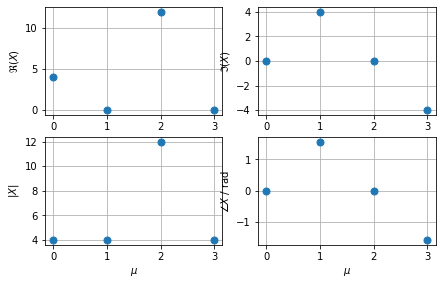

In [38]:
plt.figure(figsize=(7, 4.375))
plt.subplot(2, 2, 1)
plt.plot(mu, X.real, 'C0o', ms=7)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\Re(X)$')
plt.grid(True)
plt.subplot(2, 2, 2)
plt.plot(mu, X.imag, 'C0o', ms=7)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\Im(X)$')
plt.grid(True)
plt.subplot(2, 2, 3)
plt.plot(mu, np.abs(X), 'C0o', ms=7)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$|X|$')
plt.grid(True)
plt.subplot(2, 2, 4)
plt.plot(mu, np.angle(X), 'C0o', ms=7)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\angle X$ / rad')
plt.grid(True)

**d)**

Remove the DC component in the DFT spectrum `X` and from that spectrum synthesise the signal $x_r[k]$ via IDFT.

Check that the synthesised signal corresponds to
\begin{equation}
x_r[k]=-2\cdot\sin\left(\frac{2\pi}{4}k\right)+3\cdot\cos\left(\frac{2\pi}{4}\cdot2k\right)
\hspace{5mm}\text{for}\,\,0\leq k\leq3
\end{equation}

by help of a linear combination using the Fourier matrix.

In [39]:
X[0] = 0  # remove DC

# IDFT as matrix mul
xr1 = 1/N * W@X

# IDFT as linear combination of the Fourier matrix column vectors, i.e. DFT signals
xr2 = 1/N * (X[0]*W[:, 0] + X[1]*W[:, 1] + X[2]*W[:, 2] + X[3]*W[:, 3])

xr_check = -2*np.sin(2*np.pi/N*k) + 3*np.cos(2*np.pi/N*2*k)
print(np.allclose(xr1, xr_check))
print(np.allclose(xr2, xr_check))

True
True


**e)**

A DFT-based audio analyser shall exhibit a frequency resolution of
$\Delta f=0.5$ Hz for a sampling frequency $f_s=44100$ Hz using a rectangular
window.

Determine the minimum required DFT length $N$ when only lengths $N=2^M$
($M\in\mathbb{N}$) are allowed.

What is the resulting frequency resolution then?

**Solution**

\begin{align}
\Delta f=\frac{f_s}{N}=\frac{f_s}{2^M}\stackrel{!}{=}0.5\,\text{Hz}\\
M=\left\lceil\log_{2}\left(\frac{f_s}{\Delta f}\right)\right\rceil_{\in\mathbb{N}}\\
=\left\lceil\log_{2}\left(\frac{44100\,\text{Hz}}{0.5\,\text{Hz}}\right)\right\rceil_{\in\mathbb{N}}\\
=\left\lceil16.4285...\right\rceil_{\in\mathbb{N}}\\
=17\\
\Rightarrow\hspace{5mm} N=2^M=2^{17}=131072
\end{align}
The resulting frequency resolution is thus
\begin{equation}
\Delta f=\frac{f_s}{N}=\frac{44100\,\text{Hz}}{131072}\approx0.3365\,\text{Hz}.\nonumber
\end{equation}

In [40]:
df = 0.5
fs = 44100
M = (np.ceil(np.log10(fs/df) / np.log10(2)))
Ntmp = 2**M
print('N =', Ntmp.astype(int))
print('df =', fs/Ntmp.astype(int), 'Hz')

N = 131072
df = 0.336456298828125 Hz


## Exercise 3: DFT Analysis Using a Rectangular Window / DTFT Interpolation

The DFT spectrum $X[\mu]$ can used for interpolation towards the DTFT spectrum $X(\Omega)$ with

\begin{equation}
X(\Omega)=\sum_{\mu=0}^{N-1}X[\mu]\cdot\mathrm{e}^{-\mathrm{j}\frac{\left(\Omega-\frac{2\pi}{N}\mu\right)(N-1)}{2}}\cdot\text{psinc}_N\left(\Omega-\frac{2\pi}{N}\mu\right).
\end{equation}

The interpolation kernel utilises the so-called **periodic sinc function**

\begin{align}
\text{psinc}_N(\Omega)=\begin{cases}\frac{1}{N}\cdot\frac{\sin\left(\frac{N}{2}\Omega\right)}{\sin\left(\frac{1}{2}\Omega\right)}&\text{for }\Omega\neq2\pi m\\
(-1)^{m(N-1)}&\text{for }\Omega=2\pi m\end{cases},\,\,m\in\mathbb{Z},
\end{align}

which is also known as aliased sinc and Dirichlet function.
This interpolation implies:
- the DFT $X[\mu]$ stems from a signal $x[k]$ for which periodicity of $N$ is inherent, we assume the first period at $0\leq k\leq N-1$ 
- the DFT spectrum is discrete and $N$ periodic
- the DTFT $X(\Omega)$ stems from the signal $x[k]$ for $0\leq k\leq N-1$, for all other $k$ is $x[k]=0$, i.e. considering only one period
- the DTFT spectrum is continuous and $2\pi$ periodic, which means that the signal $x[k]$ can not be periodic

**Task** 

A cosine signal $x[k]=\cos(\Omega k)$ with $0\leq k \leq N-1$ is to be analysed with the DFT using a rectangular window and assuming sampling frequency of $f_s=48$ kHz.

For the parameters

- $\Omega=2\cdot\frac{2\pi}{N}$, $N=8$
- $\Omega=2.5\cdot\frac{2\pi}{N}$, $N=8$
- $\Omega=2\cdot\frac{2\pi}{N}$, $N=9$
- $\Omega=2.5\cdot\frac{2\pi}{N}$, $N=9$

perform the following subtasks:

**a)**

Calculate the spectrum $X[\mu]$ of $x[k]$ and visualise the real and
imaginary part as well as the magnitude and the phase of $X[\mu]$ over
$0\leq\mu\leq N-1$.

**b)**

Check the expected axial and point symmetries.

**c)**

Implement the DTFT interpolation equation above and visualise the $|X[\mu]|$ and $|X(\Omega)|$ over the frequency axes $\mu$, $\Omega$ and $f$.

How and why the results are different?

**Solution**

It is meaningful to code two functions for repeated calculations, the first is the DFT to DTFT interpolation, the second function creates the signal and calculates the DFT, DTFT and plots the requested graphs.

In [41]:
def dft2dtft(X, Om):
    # DFT spectrum X
    # digital angular freqency Om for which DTFT shall be evaluated
    # DTFT Xi
    N = len(X)
    Xi = np.zeros(len(Om), dtype='complex')
    for i, Omega in enumerate(Om):
        for mu_dft in range(N):
            Xi[i] += X[mu_dft] *\
                np.exp(-1j/2*(Omega - 2*np.pi/N*mu_dft)*(N-1)) *\
                diric(Omega - 2*np.pi/N*mu_dft, N)
    return Xi

In [42]:
def dft2dtft_playground_plot(N=8, Om_sig=2,
                             Om=np.linspace(0, 2*np.pi, 2**8), fs=48000):
    mu = np.arange(N)
    k = mu
    x = np.cos(Om_sig*k)  # indicated symmetry holds for real input signals! 
    dOm = 2*np.pi/N
    X_dft = fft(x)
    X_dtft = dft2dtft(X_dft, Om)

    plt.figure(figsize=(7, 4.375))
    plt.subplot(2, 2, 1)
    plt.plot(mu, X_dft.real, 'C0o', ms=7)
    plt.plot([N/2, N/2], [-N/2, N/2], 'C3:')  # indicate axial symmetry
    plt.xlim(0, N-1)
    plt.ylim(-N/2, N/2)
    plt.xlabel(r'$\mu$')
    plt.ylabel(r'$\Re(X)$')
    plt.title('axial symmetry wrt red line')
    plt.grid(True)
    plt.subplot(2, 2, 2)
    plt.plot(mu, X_dft.imag, 'C0o', ms=7)
    plt.plot([N/2], [0], 'C3o')  # indicate point symmetry
    plt.xlim(0, N-1)
    plt.ylim(-N/2, N/2)
    plt.xlabel(r'$\mu$')
    plt.ylabel(r'$\Im(X)$')
    plt.title('point symmetry wrt red point')
    plt.grid(True)
    plt.subplot(2, 2, 3)
    plt.plot(mu, np.abs(X_dft), 'C0o', ms=7)
    plt.plot([N/2, N/2], [0, N/2], 'C3:')  # indicate axial symmetry
    plt.xlim(0, N-1)
    plt.ylim(0, N/2)
    plt.xlabel(r'$\mu$')
    plt.ylabel(r'$|X|$')
    plt.grid(True)
    plt.subplot(2, 2, 4)
    plt.plot(mu, np.angle(X_dft), 'C0o', ms=7)
    plt.plot([N/2], [0], 'C3o')  # indicate point symmetry    
    plt.xlim(0, N-1)
    plt.ylim(-np.pi, np.pi)
    plt.xlabel(r'$\mu$')
    plt.ylabel(r'$\angle X$ / rad')
    plt.grid(True)

    plt.figure(figsize=(7, 9))
    plt.subplot(3, 1, 1)
    plt.plot(mu, np.abs(X_dft), 'C0o', ms=7, label='DFT')
    plt.plot(Om/dOm, np.abs(X_dtft), 'C1', label='DTFT')
    plt.xlim(0, N)
    plt.xlabel(r'$\mu$')
    plt.title('magnitude spectrum |X|')
    plt.legend()
    plt.grid(True)
    plt.subplot(3, 1, 2)
    plt.plot(mu*dOm, np.abs(X_dft), 'C0o', ms=7)
    plt.plot(Om, np.abs(X_dtft), 'C1')
    plt.xlim(0, 2*np.pi)
    plt.xlabel(r'$\Omega$ / rad')
    plt.grid(True)
    plt.subplot(3, 1, 3)
    plt.plot(mu*fs/N, np.abs(X_dft), 'C0o', ms=7)
    plt.plot(Om*fs/2/np.pi, np.abs(X_dtft), 'C1')
    plt.xlim(0, fs)
    plt.xlabel(r'$f$ / Hz with fs='+str(fs/1000)+'kHz')
    plt.grid(True)

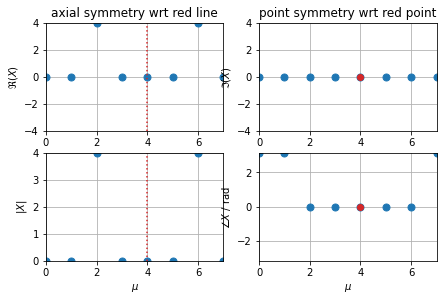

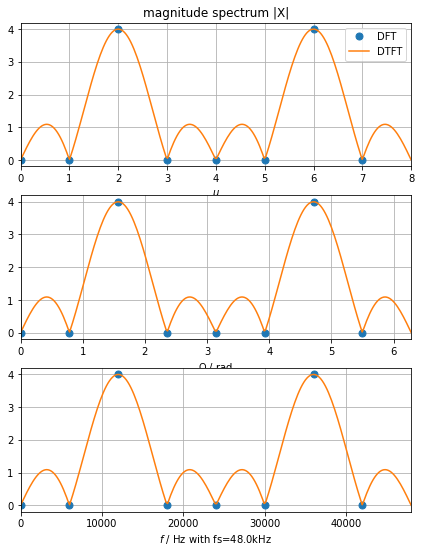

In [43]:
N = 8
Om_sig = 2*2*np.pi/N
dft2dtft_playground_plot(N=N, Om_sig=Om_sig)

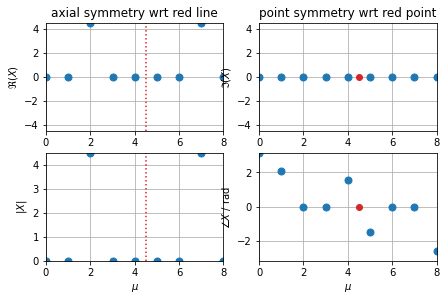

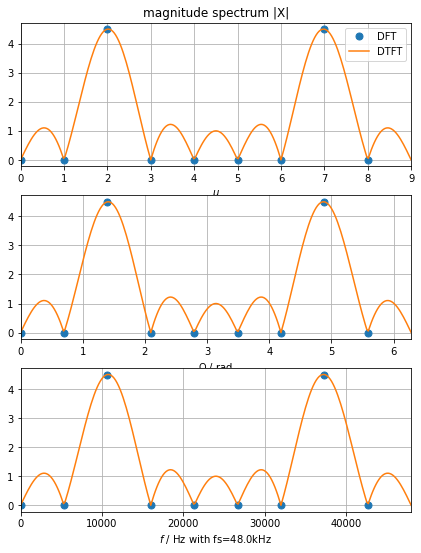

In [44]:
N = 9
Om_sig = 2*2*np.pi/N
dft2dtft_playground_plot(N=N, Om_sig=Om_sig)

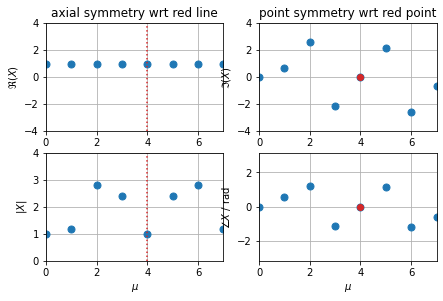

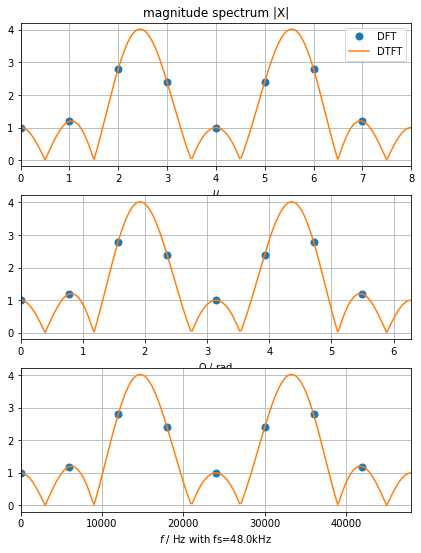

In [45]:
N = 8
Om_sig = 2.5*2*np.pi/N
dft2dtft_playground_plot(N=N, Om_sig=Om_sig)

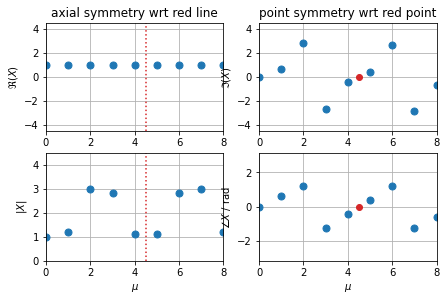

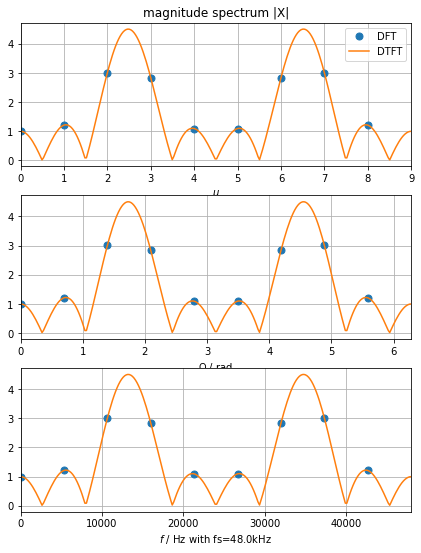

In [46]:
N = 9
Om_sig = 2.5*2*np.pi/N
dft2dtft_playground_plot(N=N, Om_sig=Om_sig)

## Exercise 4: DFT / DTFT of an Finite Impulse Response (FIR)

The finite length impulse response (FIR) $h[k]$ of an LTI system is given
as

\begin{equation}
h[k]=\frac{1}{8}\cdot\left(11 \delta[k]-5 \delta[k-1]+7 \delta[k-2]-9 \delta[k-3]\right).
\end{equation}

Obviously, the LTI system is non-recursive.

The magnitude and phase spectrum is to be evaluated from
- DFT
- DTFT
- DFT of zerpadded impulse response

Discuss the different approaches.

at DFT frequencies:
level [-6.021 -3.01  12.041 -3.01 ] dB
phase [  0. -45.   0.  45.] deg


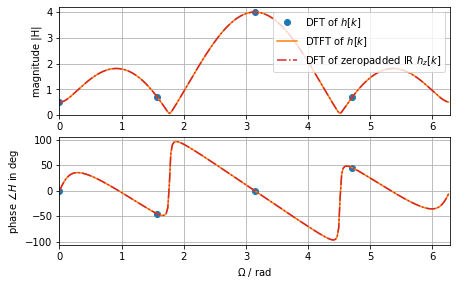

In [50]:
h = np.array([11, -5, 7, -9]) / 8  # FIR

# DFT
Nh = h.size  # length of FIR
H_dft = fft(h)  # DFT of FIR
mu = np.arange(Nh)  # DFT frequency vector mu

with np.printoptions(precision=3, suppress=True):
    print('at DFT frequencies:')
    print('level', 20*np.log10(np.abs(H_dft)), 'dB')
    print('phase', np.angle(H_dft)*180/np.pi, 'deg')

# interpolation towards DTFT  
NOm = 2**8  # DTFT frequencies to be plotted
dOm = 2*np.pi/NOm  # resolution
Om = np.arange(NOm)*dOm
H_dtft = dft2dtft(fft(h), Om)

# interpolation via zeropadding and DFT
hz = np.zeros(NOm)  # zero signal
hz[0:h.size] = h  # insert h yields zeropadded FIR in hz
Hz_dft = fft(hz)  # DFT of zeropadded FIR

plt.figure(figsize=(7,4.375))
plt.subplot(2,1,1)
plt.plot(mu*2*np.pi/Nh, np.abs(H_dft), 'C0o', label=r'DFT of $h[k]$')
plt.plot(Om, np.abs(H_dtft), 'C1', label=r'DTFT of $h[k]$')
plt.plot(Om, np.abs(Hz_dft), 'C3-.', label=r'DFT of zeropadded IR $h_z[k]$')
plt.xlim(0, 2*np.pi)
plt.ylim(0)
#plt.xlabel(r'$\Omega$ / rad')
plt.ylabel(r'magnitude |H|')
plt.legend()
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(mu*2*np.pi/Nh, np.angle(H_dft)*180/np.pi, 'C0o', label=r'DFT of $h[k]$')
plt.plot(Om, np.angle(H_dtft)*180/np.pi, 'C1', label=r'DTFT of $h[k]$')
plt.plot(Om, np.angle(Hz_dft)*180/np.pi, 'C3-.', label=r'DFT of zeropadded IR $h_z[k]$')
plt.xlim(0, 2*np.pi)
plt.xlabel(r'$\Omega$ / rad')
plt.ylabel(r'phase $\angle H$ in deg')
plt.grid(True)

**Copyright**

The notebooks are provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebooks for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Frank Schultz, Digital Signal Processing - A Tutorial Featuring Computational Examples* with the URL https://github.com/spatialaudio/digital-signal-processing-exercises